Input the number of timeperiods for which RSI needs to be implemented- 14


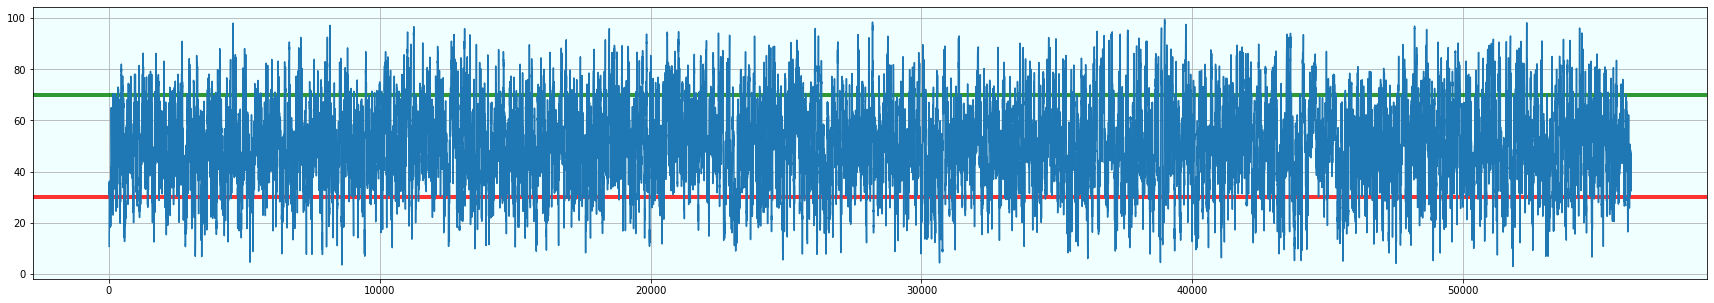

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
df=pd.read_csv('dataset.csv')
df=df.ffill(axis=0)
cp=df['Close']
op=df['Open']
hi=df['High']
lo=df['Low']
n=int(input("Input the number of timeperiods for which RSI needs to be implemented- ")) #user can input the value of n (I've done the calculations using 14)
rsi=np.array([np.nan for i in range(n)])             
sp=0
sn=0
u=0
o=0
for i in range(1, len(cp)):                          #code to to generate an array of RSI
    diff=cp[i]-cp[i-1]
    if(i<n):
        if(diff>0):
            sp+=diff
        elif(diff<0):
            sn-=diff
        continue
    if(i==n):
        avggain=sp/n
        avgloss=sn/n
    elif(i>n):
        if(diff>0):
            avggain=(avggain*(n-1)+diff)/n
            avgloss=avgloss*(n-1)/n
        elif(diff<0):
            avggain=avggain*(n-1)/n
            avgloss=(avgloss*(n-1)-diff)/n
        else:
            avggain*=(n-1)/n
            avgloss*=(n-1)/n
    RS=avggain/avgloss
    RSI=(RS/(1+RS))*100
    rsi=np.append(rsi, RSI)
    if(RSI<30):
        u+=1
    if(RSI>70):
        o+=1
plt.figure(figsize=(30, 5))
plt.grid()
plt.rcParams['axes.facecolor'] = 'azure'
plt.axhline(y=30, color='red', lw=4, alpha=0.8)
plt.axhline(y=70, color='green', lw=4, alpha=0.8)
plt.plot(rsi)
plt.show()    

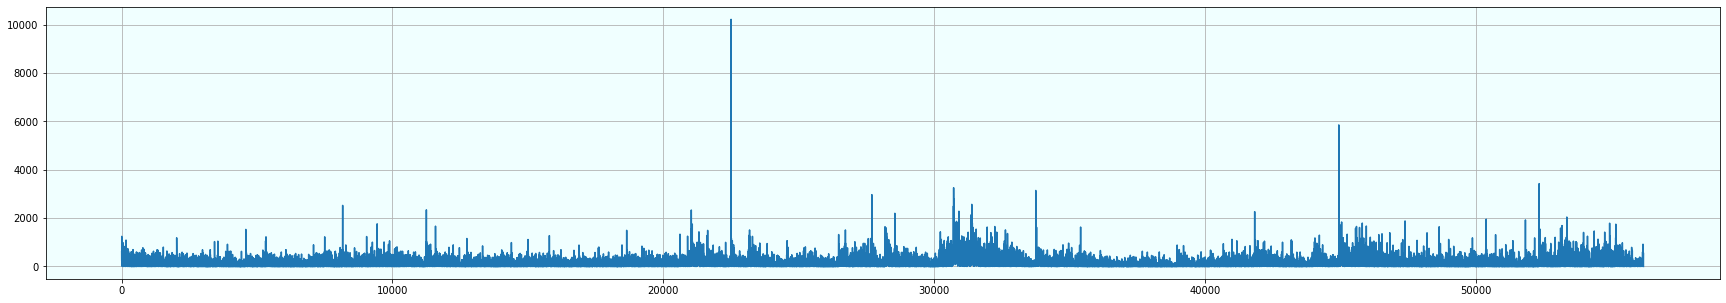

56192

In [86]:
s=0
tr=[]
for i in range(1, len(cp)):                             # for true range
    l=[]
    c_high=hi[i]
    c_low=lo[i]
    p_close=cp[i-1]
    l.append(c_high-c_low)
    l.append(abs(c_high-p_close))
    l.append(abs(c_low-p_close))
    tr.append(max(l))
"""
    #print(tr)
    if(i<n-1):                                
        s+=tr
    elif(i==n-1):                    tried implementing atr here
        s+=tr
        #print(s)
        atr=np.append(atr, s)
    elif(i>n-1):
        s=s-s/n+tr
        #print(s)
        atr=np.append(atr, s)
"""
plt.rcParams['axes.facecolor'] = 'azure'
plt.figure(figsize= (30, 5))
plt.grid()
plt.plot(tr)
plt.show()
len(tr)
#plt.show()
#print(atr)        


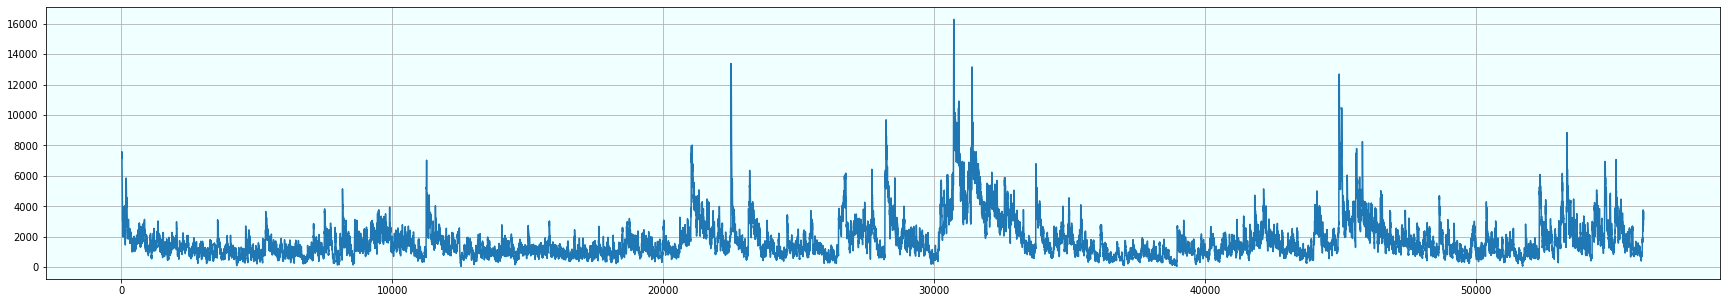

In [89]:
atr=np.array([np.nan for i in range(n)]) 
s=0
for i in range(1, len(cp)-1):          #for average true range
    if(i<n):
        s+=tr[i]
    elif(i==n):
        s+=tr[i]
        atr=np.append(atr, s)
    else:
        s=s*((n-1)/n)+tr[i]
        atr=np.append(atr, s)
plt.rcParams['axes.facecolor'] = 'azure'
plt.figure(figsize=(30, 5))
plt.grid()
plt.plot(atr)
plt.show()

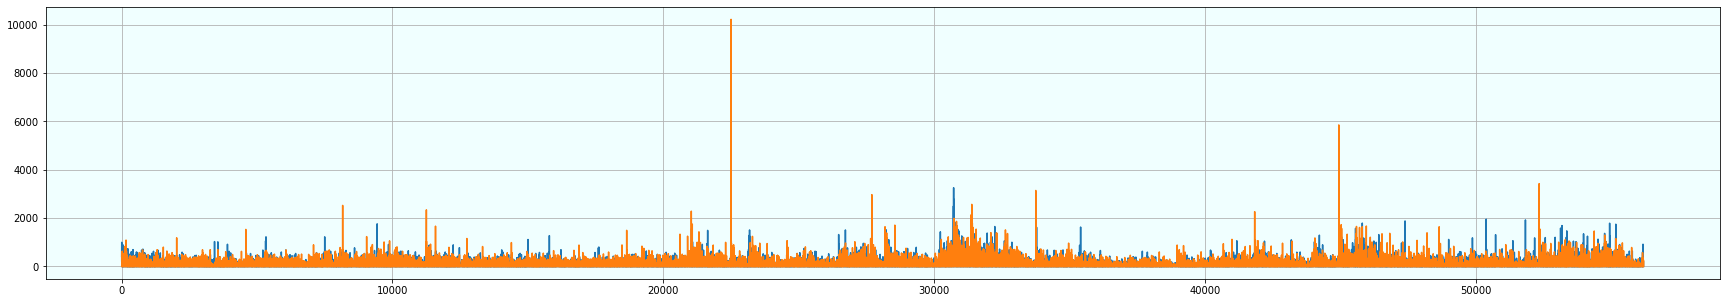

In [88]:
dmp=[]                                                  #positive directional movement
dmn=[]                                                  #negative directional movement
for i in range(1, len(cp)):                             # code for directional movements 
    pdm=hi[i]-hi[i-1]
    ndm=lo[i-1]-lo[i]
    if(pdm>=ndm):
        if(pdm>0):
            dmp=np.append(dmp, pdm)
        else:
            dmp=np.append(dmp, 0)
        dmn=np.append(dmn, 0)
        continue
    elif(ndm>pdm):
        if(ndm>0):
            dmn=np.append(dmn, ndm)
        else:
            dmn=np.append(dmn, 0)
        dmp=np.append(dmp, 0)
        continue
plt.rcParams['axes.facecolor'] = 'azure'
plt.figure(figsize=(30, 5))
plt.grid()
plt.plot(dmn)
plt.plot(dmp)
plt.show()

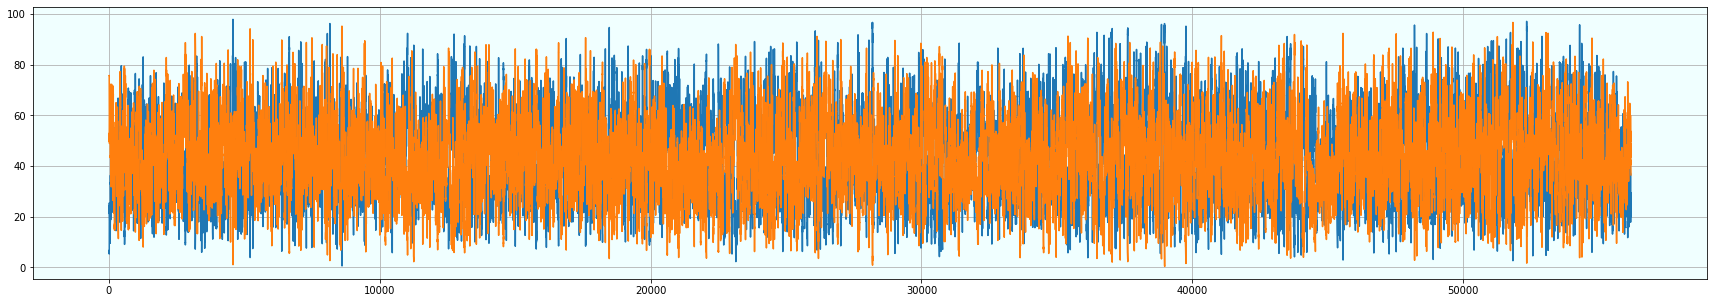

In [91]:
dmp14=np.array([np.nan for i in range(n)])                       #smoothed values for directional movement
dmn14=np.array([np.nan for i in range(n)])                       #..
di_pos14=np.array([np.nan for i in range(n)])                    #smoothed directional indicators
di_neg14=np.array([np.nan for i in range(n)])
sp=0
sn=0
for i in range(1, len(cp)-1):
    if(i<n):
        sp+=dmp[i]
        sn+=dmn[i]
    if(i==n):
        dmp14=np.append(dmp14, sp)
        di_pos14=np.append(di_pos14, sp/atr[i]*100)
        dmn14=np.append(dmn14, sn)
        di_neg14=np.append(di_neg14, sn/atr[i]*100)
    elif(i>n):
        sp=sp*(n-1)/n+dmp[i]
        sn=sn*(n-1)/n+dmn[i]
        dmp14=np.append(dmp14, sp)
        di_pos14=np.append(di_pos14, sp/atr[i]*100)
        dmn14=np.append(dmn14, sn)
        di_neg14=np.append(di_neg14, sn/atr[i]*100)
plt.rcParams['axes.facecolor'] = 'azure'
plt.figure(figsize=(30, 5))
plt.grid()
plt.plot(di_pos14)
plt.plot(di_neg14)
plt.show()

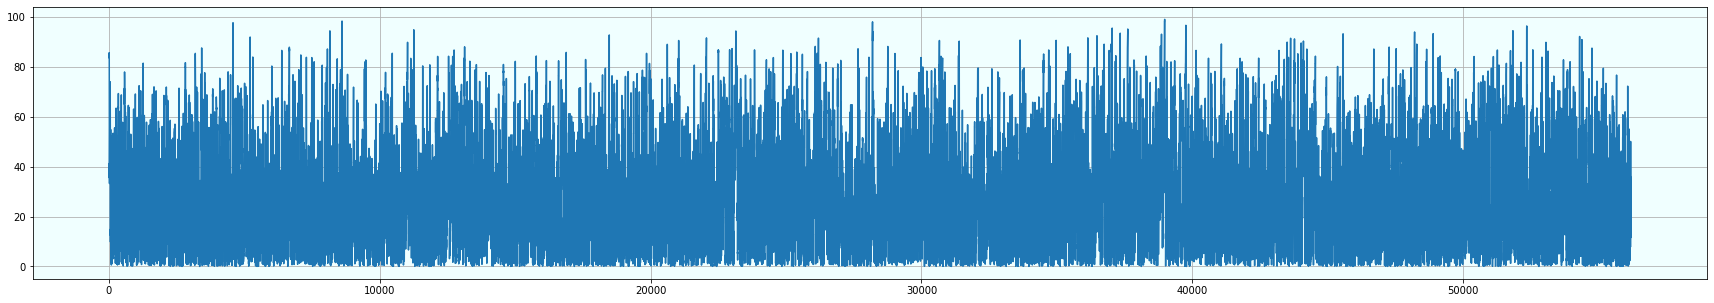

In [92]:
DX=np.array([np.nan for i in range(n)])                      #directional index
for i in range(len(cp)-1):
    if(np.isnan(di_pos14[i])):
        continue
    dx=(di_pos14[i]-di_neg14[i])/(di_pos14[i]+di_neg14[i])*100
    dx=abs(dx)
    DX=np.append(DX, dx)
plt.rcParams['axes.facecolor'] = 'azure'
plt.figure(figsize=(30, 5))
plt.grid()
plt.plot(DX)
plt.show()

C:\Users\edcnsp1\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in greater


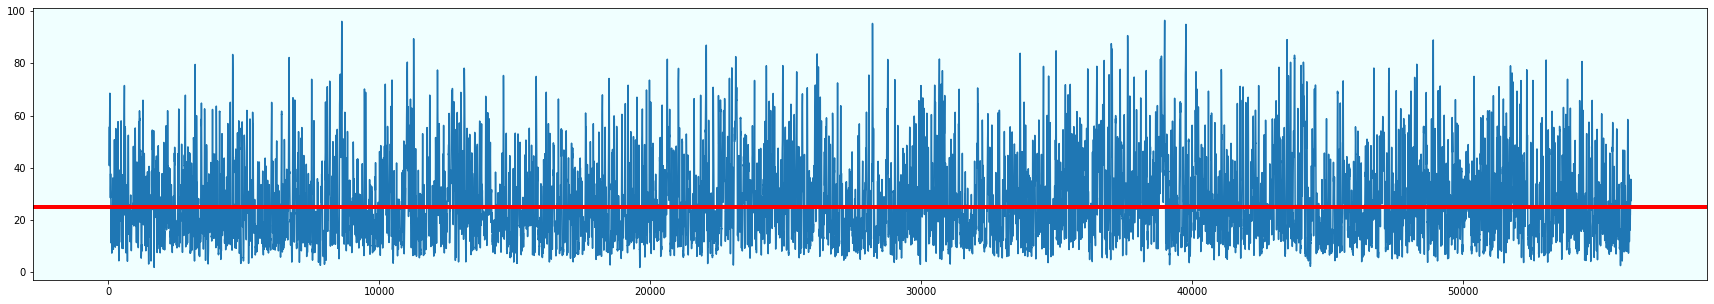

In [95]:
ADX=np.array([np.nan for i in range(2*n-1)])                    #average directional index
adxs=0
fl=0
for i in range(len(cp)-1):
    if(np.isnan(DX[i])):
        continue
    elif(i<2*n-1):
        adxs+=DX[i]
    elif(i==2*n-1):
        adxs+=DX[i]
        adxs/=n
        ADX=np.append(ADX, adxs)
    else:
        try:
            adxs=(adxs*n-DX[i-n]+DX[i])/n
            ADX=np.append(ADX, adxs)
        except:
            fl=1
            break
plt.figure(figsize=(30, 5))
plt.grid()
plt.rcParams['axes.facecolor'] = 'azure'
plt.grid()
#plt.plot(ADX)
ADXM=np.where(ADX>25, ADX, np.nan)
plt.plot(ADX)
plt.axhline(y=25, color='red', lw=4)#, linestyle='--')
#plt.plot(di_pos14)
#plt.plot(di_neg14)
plt.show()

In [97]:
print(df['TimeStamp'][11430][10:14])  #.. to get a hang of indices that'll be needed to exit at 3:29 PM

9:20


In [98]:
timestampb=[]                         #list to store the time of opening long positions 
timestamps=[]                         #list to store the time of closing long positions 
timestampss=[]                        #list to store the time of opening short positions
timestampbs=[]                        #list to store the time of closing short positions
bpl=[]                                #list to store the buying prices when holding long position
spl=[]                                #list to store the selling prices when holding long position
bps=[]                                #list to store the buying prices when holding short position
sps=[]                                #list to store the selling prices when holding short position
fl=0                                  #variable to check if long position is being held
sh=0                                  #variable to check if short position is being held
Min=10**9                             #variable to keep track of local minimas
adx=ADX
Max=0                                 #variable to keep track of local maximas
winlosslist=[]
k=0
for i in range(len(cp)-1):
    if(np.isnan(adx[i])):# or i<250):
       continue
    if(fl==1 and cp[i]>Max):
        Max=cp[i]
    if(sh==1 and cp[i]<Min):
        Min=cp[i]
    if(fl==0 and (adx[i]>25 and rsi[i]>66.6)):
        if(sh==1):
            Min=10**9
            sh=0
            bps.append(op[i+1])
            timestampbs.append(df['TimeStamp'][i+1]) 
        fl=1
        bpl.append(op[i+1])
        timestampb.append(df['TimeStamp'][i+1])
    elif(fl==1 and ((adx[i]>25 and rsi[i]<33.3) or cp[i]<Max*0.999)):
        fl=0
        Max=0
        spl.append(cp[i+1])
        timestamps.append(df['TimeStamp'][i+1])       
    if(sh==0 and (adx[i]>25 and rsi[i]<33.3)):
        if(fl==1):
            fl=0
            Max=0
            spl.append(cp[i+1])
            nsl+=1
            timestamps.append(df['TimeStamp'][i+1])
        sh=1
        sps.append(op[i+1])
        timestampss.append(df['TimeStamp'][i+1])
    if(sh==1 and cp[i]>1.001*Min):
            Min=10**9
            sh=0
            bps.append(cp[i+1])
            timestampbs.append(df['TimeStamp'][i+1]) 
    if(df['TimeStamp'][i][10:14]=='3:29'):                    #close all the positions if they are held at this time
        if(sh==1):
            sh=0
            Min=10**9
            bps.append(cp[i+1])
            bpindex=len(bps)
            timestampbs.append(df['TimeStamp'][i+1])        
        if(fl==1):
            Max=0
            fl=0
            spl.append(cp[i+1])
            spindex=len(spl)
            timestamps.append(df['TimeStamp'][i+1])
s=0
w=0
l=0
lpro=[]
spro=[]
for sp, bp in zip(spl, bpl):
    x=sp-bp-10
    lpro.append(x*0.5)
    s+=x
    if(x>0):
        w+=1
    elif(x<0):
        l+=1
for sp,bp in zip(sps, bps):
    x=sp-bp-10
    spro.append(x*0.5)
    s+=x
    if(x>0):
        w+=1
    elif(x<0):
        l+=1
print(w/l)      #win loss ratio
print(s, cp[len(cp)-1]-cp[0])
print(s/cp[0])
print((cp[len(cp)-1]-cp[0])/cp[0])

0.7146814404432132
213751.0 95477.0
0.07234895217206616
0.032316391064988514


In [99]:
print(len(bpl), len(spl), len(bps), len(sps), len(timestampb))
print(s*0.5)                       #profits from the algo
print(sum(lpro)+sum(spro))
print((cp[len(cp)-1]-cp[0])*0.5)   #profits gained by hodling
print()

307 307 312 312 307
106875.5
106875.5
47738.5



In [79]:
import csv
with open('Summary.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["SN", "Buying Price (Long)", "Timestamp", "Selling Price (Long)", "Timestamp", "P/L", "Selling Price (Short)", "Timestamp", "Buying Price (Short)", "Timestamp", "P/L"])
    for i in range(len(bps)):
        if(i<len(bpl)):
             writer.writerow([i+1, bpl[i], timestampb[i], spl[i], timestamps[i], lpro[i], sps[i], timestampss[i], bps[i], timestampbs[i], spro[i]])
        else:
             writer.writerow([i+1, np.nan, np.nan, np.nan, np.nan, np.nan, sps[i], timestampss[i], bps[i], timestampbs[i], spro[i]] )

In [ ]:
#I've coded another algorithm which uses +DI and -DI and ADX and RSI. It gives whopping (and kinda absurd) 900% returns
#more than the market but due to time constraints, I wasn't be able to verify its veracity nor test it much.


In [41]:
timestampb=[]
timestamps=[]
timestampss=[]
timestampbs=[]
bpl=[]
spl=[]
bps=[]
sps=[]
fl=0
sh=0
min
adx=ADX
sh=0
for i in range(len(cp)-1):
    if(fl==0 and (di_pos14[i]>di_neg14[i] and di_pos14[i-1]<=di_neg14[i-1])):
        if(sh==1):
            sh=0
            bps.append(op[i+1])
            timestampbs.append(df['TimeStamp']) 
        fl=1
        bpl.append(op[i+1])
        timestampb.append(df['TimeStamp'][i+1])
    if(fl==1 and (adx[i]>25 and rsi[i]<33.3)):
        Max=0
        fl=0
        spl.append(op[i+1])
        timestamps.append(df['TimeStamp'][i+1])
    if(sh==1 and (adx[i]>25 and rsi[i]>66.6)):
        Min=10**9
        sh=0
        bps.append(op[i+1])
        timestampbs.append(df['TimeStamp'])  
    if(sh==0 and (di_pos14[i]<di_neg14[i] and di_pos14[i-1]>=di_neg14[i-1])):
        if(fl==1):
            fl=0
            spl.append(op[i+1])
            timestamps.append(df['TimeStamp'][i+1])             
        sh=1
        sps.append(cp[i+1])
        timestampss.append(df['TimeStamp'][i+1])
    if(df['TimeStamp'][0][10:14]=='3:29'):
        if(sh==1):
            sh=0
            Min=10**9
            bps.append(op[i+1])
            timestampbs.append(df['TimeStamp'])        
        if(fl==1):
            Max=0
            fl=0
            spl.append(op[i+1])
            timestamps.append(df['TimeStamp'][i+1]) 

In [43]:
s=0
w=0
l=0
retal=[]
for sp, bp in zip(spl, bpl):
    diff=sp-bp-10
    s+=diff-10
    retal.append(diff)
    if(diff>0):
        w+=1
    elif(diff<0):
        l+=1
for sp,bp in zip(sps, bps):
    diff=sp-bp-10
    s+=diff
    retal.append(diff)
    if(diff>0):
        w+=1
    elif(diff<0):
        l+=1
#print(retal)
print(w/l, w, l)
print(s)
print(s/cp[0])
print((cp[len(cp)-1]-cp[0])/cp[0])

0.8042016806722689 1914 2380
878203.0
0.2972480448950649
0.032316391064988514
